<a href="https://colab.research.google.com/github/mohigeo33/lst_timeseries/blob/main/Statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install altair_transform

In [146]:
#loading libraries
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import numpy as np
import seaborn as sns
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from scipy.stats import kstest
from sklearn.metrics import r2_score
import altair as alt
import altair_transform

In [24]:
# mounting the google dirive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
# setting the working directory
os.chdir('/content/drive/MyDrive/Thesis/Data/AOI')
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content/drive/MyDrive/Thesis/Data/AOI


In [148]:
# function for loading the csv/txt file
def load_csv(filepath):
    data =  []
    col = []
    checkcol = False
    with open(filepath) as f:
        for val in f.readlines():
            val = val.replace("\n","")
            val = val.split(',')
            if checkcol is False:
                col = val
                checkcol = True
            else:
                data.append(val)
    df = pd.DataFrame(data=data, columns=col)
    return df

In [ ]:
myData = load_csv('dfall.csv')
df = myData
print(df.head())

In [150]:
# Converting the variables into numeric
#Mean
df["MeanNDVI"] = pd.to_numeric(df["MeanNDVI"])
df["MeanIBI"] = pd.to_numeric(df["MeanIBI"])
df["MeanMNDWI"] = pd.to_numeric(df["MeanMNDWI"])
df["MeanLST"] = pd.to_numeric(df["MeanLST"])

meanndvi = df["MeanNDVI"]
meanibi = df["MeanIBI"]
meanmndwi = df["MeanMNDWI"]
meanlst = df["MeanLST"]

#Max
df["MaxNDVI"] = pd.to_numeric(df["MaxNDVI"])
df["MaxIBI"] = pd.to_numeric(df["MaxIBI"])
df["MaxMNDWI"] = pd.to_numeric(df["MaxMNDWI"])
df["MaxLST"] = pd.to_numeric(df["MaxLST"])

maxndvi = df["MaxNDVI"]
maxibi = df["MaxIBI"]
maxndwi = df["MaxMNDWI"]
maxlst = df["MaxLST"]

#Min
df["MinNDVI"] = pd.to_numeric(df["MinNDVI"])
df["MinIBI"] = pd.to_numeric(df["MinIBI"])
df["MinMNDWI"] = pd.to_numeric(df["MinMNDWI"])
df["MinLST"] = pd.to_numeric(df["MinLST"])

minndvi = df["MinNDVI"]
minibi = df["MinIBI"]
minmndwi = df["MinMNDWI"]
minlst = df["MinLST"]

#Time and cloud
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])
df['Cloud'] = pd.to_numeric(df['Cloud'])

**Adding sensor information**

In [ ]:
# Create a new DataFrame with the Category column
df2 = df.assign(Category=df['SystemIndex'].str.slice(stop=8))

# Replace the category values with 'LS5', 'LS7', and 'LS8'
df2['Category'] = df2['Category'].str.replace('2_LT05_1', 'LS5')
df2['Category'] = df2['Category'].str.replace('1_2_LE07', 'LS7')
df2['Category'] = df2['Category'].str.replace('1_1_LC08', 'LS8')

# Create a new Sensor column
df2['Sensor'] = df2['Category']

# Drop the Category column
df2 = df2.drop(columns=['Category'])
print(df2.head())


In [152]:
# drop the miscalculated lst data
df2 = df2[df2['SystemIndex'] != '2_LT05_126052_20010921']

**Overview of descriptive statistics**

In [153]:
# calculate minimum, mean, and maximum values for each column
# min values
min_minlst = df2['MinLST'].min()
min_meanlst = df2['MeanLST'].min()
min_maxlst = df2['MaxLST'].min()

# mean values
mean_minlst = df2['MinLST'].mean()
mean_meanlst = df2['MeanLST'].mean()
mean_maxlst = df2['MaxLST'].mean()

# max values
max_minlst = df2['MinLST'].max()
max_meanlst = df2['MeanLST'].max()
max_maxlst = df2['MaxLST'].max()

# create a new dataframe with the results
results_df = pd.DataFrame({
    '': ['Minimum', 'Mean', 'Maximum'],
    'MinLST': [min_minlst, mean_minlst, max_minlst],
    'MeanLST': [min_meanlst, mean_meanlst, max_meanlst],
    'MaxLST': [min_maxlst, mean_maxlst, max_maxlst]
})

# print the table
print(results_df)

               MinLST    MeanLST     MaxLST
0  Minimum  20.000004  20.410540  20.546039
1     Mean  24.338437  30.847340  43.252169
2  Maximum  37.289573  50.945118  69.394212


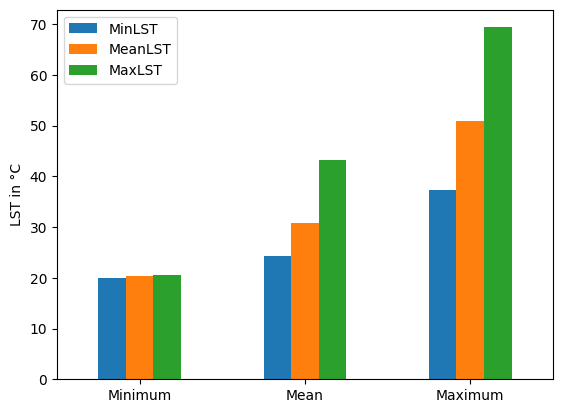

In [154]:
# create a bar chart from the dataframe
ax = results_df.plot(x='', kind='bar')

# add y-axis title
ax.set_ylabel('LST in °C')

# rotate x-axis labels
plt.xticks(rotation=0)

# show the plot
plt.show()

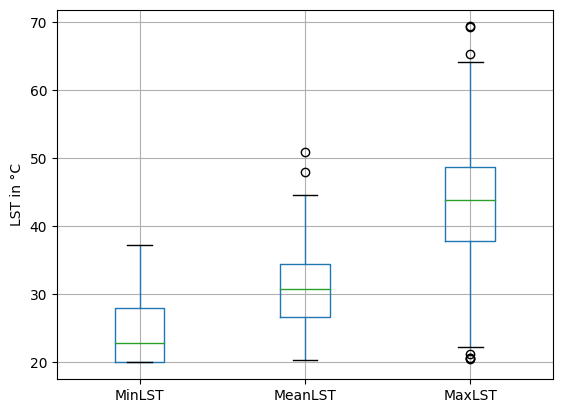

In [155]:
# create a boxplot of the distribution of values
fig, ax = plt.subplots()
df2.boxplot(column=['MinLST', 'MeanLST', 'MaxLST'], ax=ax)

# set the title and y-axis label
# ax.set_title('Distribution of LST values')
ax.set_ylabel('LST in °C')

# show the plot
plt.show()

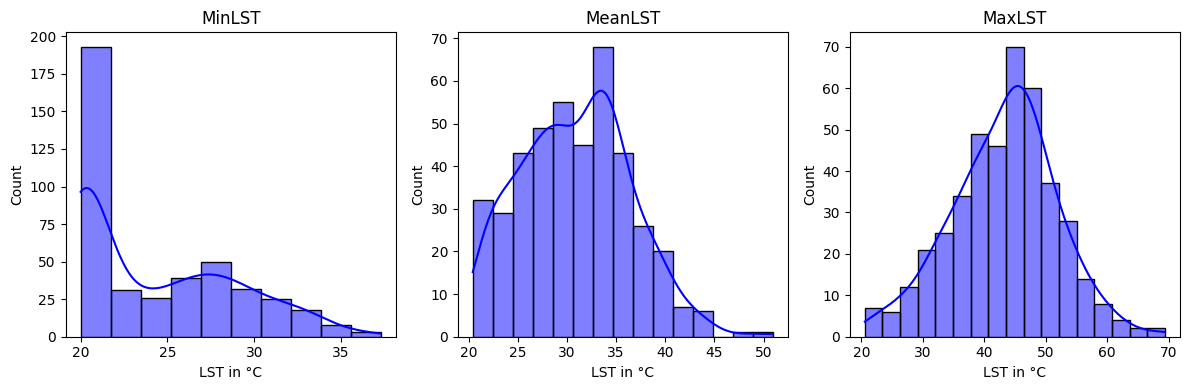

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# plot histograms with distribution curves for each column
for i, col in enumerate(['MinLST', 'MeanLST', 'MaxLST']):
    sns.histplot(df2[col], kde=True, color='blue', ax=axes[i])
    #sns.kdeplot(df2[col], color='red', ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('LST in °C')

# set the figure title
#fig.suptitle('Histograms with distribution curves')

# adjust the spacing between subplots
fig.tight_layout()

# show the plot
plt.show()


In [157]:
from scipy.stats import shapiro

for col in ['MinLST', 'MeanLST', 'MaxLST']:
    data = df2[col].dropna()
    stat, p = shapiro(data)
    print(f'Shapiro-Wilk test for {col}: statistic = {stat:.3f}, p-value = {p:.3f}')


Shapiro-Wilk test for MinLST: statistic = 0.858, p-value = 0.000
Shapiro-Wilk test for MeanLST: statistic = 0.985, p-value = 0.000
Shapiro-Wilk test for MaxLST: statistic = 0.994, p-value = 0.118


**2. Calender heatmaps**

In [158]:
# mean LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MeanLST:Q', title = 'Mean LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,45 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MeanLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

In [159]:
# maximum LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MaxLST:Q', title = 'Max LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,66 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MaxLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

In [160]:
# minimum LST
alt.Chart(df2).mark_rect().encode(
    x='Year:O',
    y='Month:O',
    color=alt.Color(
        'MinLST:Q', title = 'Min LST (in °C)', scale=alt.Scale(scheme='blueorange', domain=(20,37 ))),
    tooltip=[
        alt.Tooltip('Year:O', title='Year'),
        alt.Tooltip('Month:O', title='Month'),
        alt.Tooltip('MinLST:Q', title='LST')
    ]).properties(width=600, height=300)

alt.Chart(...)

**3. Trend of LST**

In [161]:
# Base chart
base = alt.Chart(df2).encode(
    x=alt.X('Timestamp:T', title='Year'),
    tooltip=[
        alt.Tooltip('Timestamp:T', title='Year')
    ]
)

# MeanLST line chart and trendline
mean_line = base.mark_line(color='red').encode(
    y=alt.Y('MeanLST:Q', title='LST in °C'),
    tooltip=alt.Tooltip('MeanLST:Q'),
    color=alt.value('red')
)

mean_trendline = base.transform_regression("Timestamp", "MeanLST", method="linear").mark_line(color="blue", strokeWidth=2)

# MinLST line chart
min_line = base.mark_line(color='violet').encode(
    y=alt.Y('MinLST:Q'),
    tooltip=alt.Tooltip('MinLST:Q'),
    color=alt.value('violet')
)

# MaxLST line chart
max_line = base.mark_line(color='grey').encode(
    y=alt.Y('MaxLST:Q'),
    tooltip=alt.Tooltip('MaxLST:Q'),
    color=alt.value('grey')
)

# Combine all lines and trendlines
chart = (mean_line + mean_trendline + min_line + max_line).properties(width=600, height=300).interactive()

# Add legend manually
legend = alt.Chart(pd.DataFrame({
    'LST Type': ['MeanLST', 'MinLST', 'MaxLST'],
    'Color': ['red', 'violet', 'grey']
})).mark_circle(size=100).encode(
    y=alt.Y('LST Type:N', axis=alt.Axis(orient='right')),
    color=alt.Color('Color:N', scale=None, legend=None)
)

(chart | legend)


alt.HConcatChart(...)

In [170]:
# Quartile trend of LST
base = alt.Chart(df2).encode(
    x=alt.X('Year:T', scale=alt.Scale(domain=(pd.to_datetime('2000', format='%Y'), pd.to_datetime('2021', format='%Y'))), axis=alt.Axis(format='%Y')))

# MeanLST line, band, and trendline
mean_line = base.mark_line(color='green').encode(
    y=alt.Y('median(MeanLST):Q',title='LST in °C', scale=alt.Scale(domain=(10, 60))))
mean_band = base.mark_errorband(extent='iqr', color='green').encode(y='MeanLST:Q')
mean_trendline = base.transform_regression("Year", "MeanLST", method="linear").mark_line(color="green", strokeWidth=2, strokeDash=[5, 5])

# MinLST line, band
min_line = base.mark_line(color='blue').encode(y=alt.Y('median(MinLST):Q'))
min_band = base.mark_errorband(extent='iqr', color='blue').encode(y='MinLST:Q')

# MaxLST line, band
max_line = base.mark_line(color='red').encode(y=alt.Y('median(MaxLST):Q'))
max_band = base.mark_errorband(extent='iqr', color='red').encode(y='MaxLST:Q')

# Combine all lines, bands, and trendlines
chart = ((mean_line + mean_band + mean_trendline) + (min_line + min_band) + (max_line + max_band)).properties(width=600, height=300).interactive()

# Add legend manually
legend = alt.Chart(pd.DataFrame({
    'LST Type': ['MeanLST', 'MinLST', 'MaxLST'],
    'Color': ['green', 'blue', 'red']
})).mark_circle(size=100).encode(
    y=alt.Y('LST Type:N', axis=alt.Axis(orient='right')),
    color=alt.Color('Color:N', scale=None, legend=None)
)

(chart | legend).configure_axisY(title="LST in °C")

alt.HConcatChart(...)

In [133]:
#df3 = df2.groupby(['Year', 'Month']).mean().reset_index()